In [1]:
using Pkg
Pkg.activate(".")
using Plots, DSP
gr()

  Activating project at `~/CELESTE/PROJECTS/CA`


Plots.GRBackend()

In [152]:
function update(A)
    function I(i, j)
        if i > dimension
            i = i - dimension
        elseif i < 1 
            i = i + dimension
        end
        if j > dimension 
            j = j - dimension 
        elseif j < 1
            j = j + dimension 
        end
        return (i, j)
    end
    sumneighbors(i,j) = sum([A[I(p,q)...] for p in i-1:i+1 for q in j-1:j+1 if !(i==p && j==q)])
    U = [sumneighbors(i,j) for i in 1:dimension, j in 1:dimension]
    
    # A = ((A .& (U .== 2)) .| (U==3))
    A[ A .& (U .< 2) ]            .= 0
    A[ A .& ((U.==2) .| (U.==3))] .= 1
    A[ A .& (U .> 3) ]            .= 0
    A[ .!A .& ((U.==3)) ]         .= 1 
end

update (generic function with 1 method)

In [2]:
function generateAnimation(updatefunction::Function)
	begin
		anim = @animate for i = 1:100
			updatefunction(A)
			heatmap(A,
			colorbar=:none,
			aspect_ratio=:equal,
			showaxis=false,
			grid=false,
			ticks=false,
			color=:greys)
		end
		gif(anim, "cellgif.gif", fps = 30)
	end
end

generateAnimation (generic function with 1 method)

┌ Info: Saved animation to 
│   fn = /home/sharon/CELESTE/PROJECTS/CA/cellgif.gif
└ @ Plots /home/sharon/.julia/packages/Plots/SkUg1/src/animation.jl:126


Plots.AnimatedGif("/home/sharon/CELESTE/PROJECTS/CA/cellgif.gif")
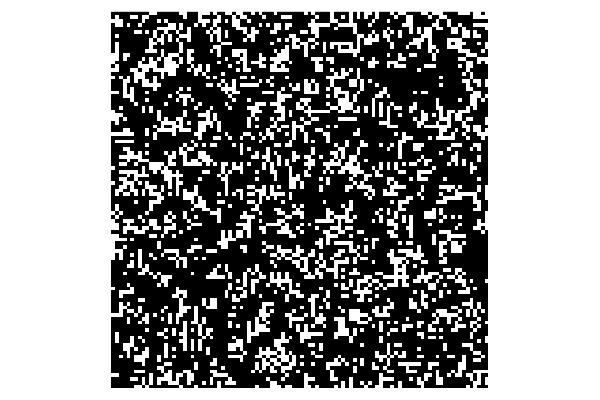

In [153]:
dimension = 100
A = rand(Bool, dimension, dimension)
generateAnimation(update)

### Convolutions

In [23]:
K = [1 1 1; 1 0 1; 1 1 1]
function update2(A)
    T = conv(A, K) 
    #cols 
    T[2:end-1, end-1] +=T[2:end-1,1]
    T[2:end-1, 2] += T[2:end-1, end]
    #rows
    T[end-1, 2:end-1] += T[1, 2:end-1]
    T[2, 2:end-1] += T[end, 2:end-1]

    U = T[2:end-1, 2:end-1]

    A[ A .& (U .< 2) ]            .= 0
    A[ A .& ((U.==2) .| (U.==3))] .= 1
    A[ A .& (U .> 3) ]            .= 0
    A[ .!A .& ((U.==3)) ]         .= 1 
end

update2 (generic function with 1 method)

In [24]:
dimension = 100
A = rand(Bool, dimension, dimension);

┌ Info: Saved animation to 
│   fn = /home/sharon/CELESTE/PROJECTS/CA/cellgif.gif
└ @ Plots /home/sharon/.julia/packages/Plots/SkUg1/src/animation.jl:126


Plots.AnimatedGif("/home/sharon/CELESTE/PROJECTS/CA/cellgif.gif")
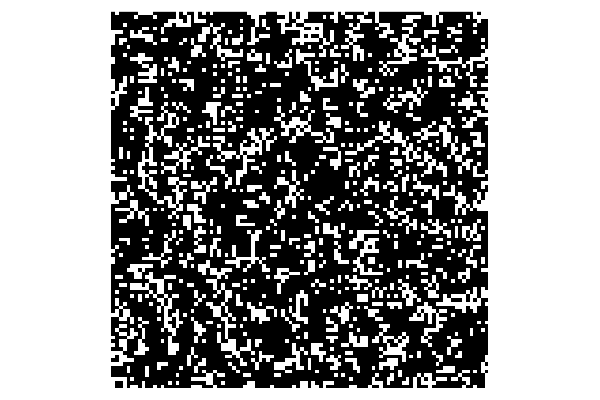

In [25]:
generateAnimation(update2)

### Growth


In [26]:
growth(u) = (u==3) - ((u<2)|(u>3))
function clip(u, a=0, b=1)
    if u>b 
        return b
    elseif u<a
        return a
    else 
        return u
    end
end

clip (generic function with 3 methods)

In [3]:
function update3(A)
    # T = conv(A, K) 
    # #cols 
    # T[2:end-1, end-1] +=T[2:end-1,1]
    # T[2:end-1, 2] += T[2:end-1, end]
    # #rows
    # T[end-1, 2:end-1] += T[1, 2:end-1]
    # T[2, 2:end-1] += T[end, 2:end-1]

    # U = T[2:end-1, 2:end-1]
    U = convolve(A, K)

    A .= clip.(A .+ growth.(U))
end

update3 (generic function with 1 method)

In [173]:
dimension = 100
A = rand(Bool, dimension, dimension);

┌ Info: Saved animation to 
│   fn = /home/sharon/CELESTE/PROJECTS/CA/cellgif.gif
└ @ Plots /home/sharon/.julia/packages/Plots/SkUg1/src/animation.jl:126


Plots.AnimatedGif("/home/sharon/CELESTE/PROJECTS/CA/cellgif.gif")
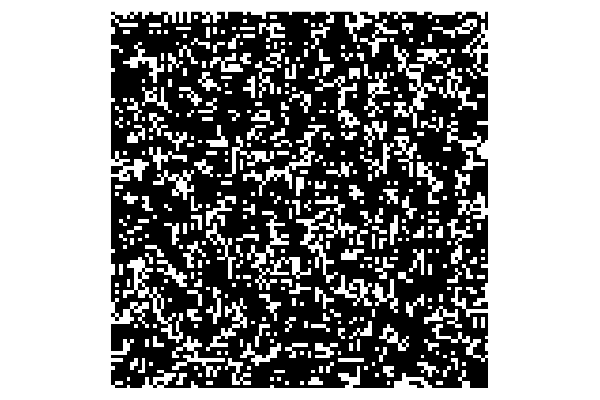

In [174]:
generateAnimation(update3)

### Extended neighborhood

In [175]:
function growth2(u) 
    b1, b2, s1, s2 = 34, 45, 34, 58
    return ((U>=b1)&(U<=b2)) - ((U<s1)|(U>s2))  
end 
R = 5
K = ones(Int, 2R+1, 2R+1)
dimension = 100
A = zeros(Int, dimension,dimension);

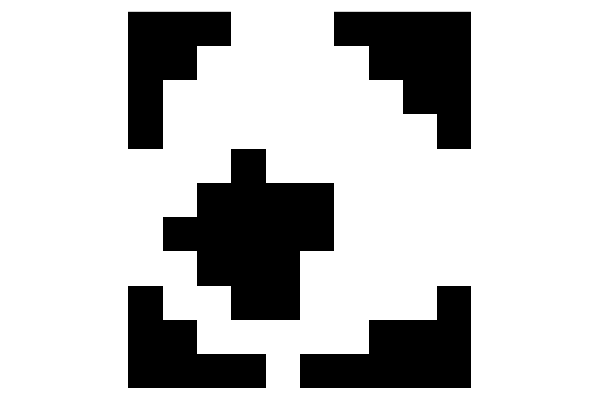

In [176]:
Bosco = [0 0 0 0 1 0 0 0 0 0 
		 0 0 1 1 1 1 1 0 0 0 
		 0 1 1 0 0 1 1 1 1 0 
		 1 1 0 0 0 1 1 1 1 1 
		 1 0 0 0 0 0 1 1 1 1 
		 1 1 0 0 0 0 1 1 1 1 
		 1 1 1 0 1 1 1 1 1 1 
		 0 1 1 1 1 1 1 1 1 0 
		 0 1 1 1 1 1 1 1 0 0 
		 0 0 1 1 1 1 1 0 0 0 
		 0 0 0 1 1 1 0 0 0 0 ]
heatmap(Bosco,
			colorbar=:none,
			aspect_ratio=:equal,
			showaxis=false,
			grid=false,
			ticks=false,
			color=:greys)

In [147]:
function convertVecVecToMatrix(X)
for i in 1:length(X)
    for j in 1:length(X[i])
        print("$(X[i][j]) ")
    end
    print(";\n")
end
end

convertVecVecToMatrix (generic function with 1 method)

In [177]:
cx, cy = 10, 11
# NOTE: x, y are interchanged, since matrix-cartesian difference
# NOTE: length(1:1+10) is 11 (HUH?)
A[cy:cy+size(Bosco, 1)-1, cx:cx+size(Bosco, 2)-1] .= Bosco;

In [178]:
function update4(A)
    U = convolve(A, K) 
    A .= clip.(A .+ growth.(U))
end

update4(A)

100×100 Matrix{Int64}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  1  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 ⋮              ⋮              ⋮        ⋱        ⋮              ⋮           
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0    

┌ Info: Saved animation to 
│   fn = /home/sharon/CELESTE/PROJECTS/CA/cellgif.gif
└ @ Plots /home/sharon/.julia/packages/Plots/SkUg1/src/animation.jl:126


Plots.AnimatedGif("/home/sharon/CELESTE/PROJECTS/CA/cellgif.gif")
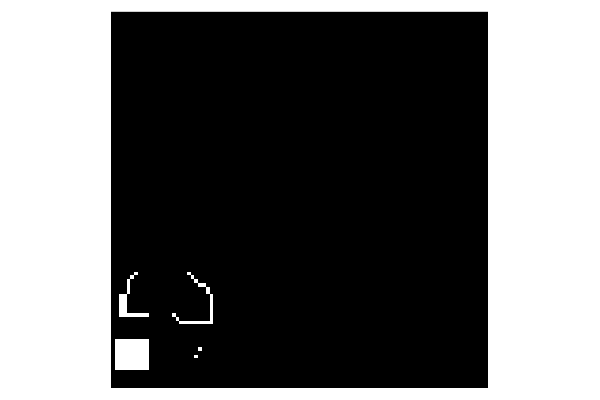

In [179]:
generateAnimation(update4)

#### Convolve function 

In [5]:
function In(X, i, j)
   A, B = size(X)
   ic, jc = i, j
   if i > A
      ic = i - A
   elseif i < 1 
      ic = i + A 
   end

   if j > B
      jc =  j - B
   elseif j < 1 
      jc = j + B
   end
   return ic, jc
end

In (generic function with 1 method)

In [4]:
function convolve(X, K)
    C = zeros(Int, size(X))
    for i in 1:size(X, 1)
        for j in 1:size(X, 2)
            for p in 1:size(K, 1)
                for q in 1:size(K, 2)
                    pn = p - (size(K, 1) ÷ 2 + 1)
                    qn = q - (size(K, 2) ÷ 2 + 1)
                    C[i, j] += K[p, q]*X[In(X, i + pn, j + qn)...]
                end
            end  
        end
    end
    return C
end

convolve (generic function with 1 method)

5×5 Matrix{Int64}:
 3  4  3  3  4
 4  6  6  5  4
 5  3  3  4  6
 2  4  5  4  3
 4  5  4  5  5

In [170]:
# K = ones(Int, 3,3)
# K[2,2] = 0
# T = conv(A, K) 
# #cols 
# T[2:end-1, end-1] +=T[2:end-1,1]
# T[2:end-1, 2] += T[2:end-1, end]
# #rows
# T[end-1, 2:end-1] += T[1, 2:end-1]
# T[2, 2:end-1] += T[end, 2:end-1]

# U = T[2:end-1, 2:end-1]

# U2 = convolve(A, K)

In [7]:
dimension = 64
cx, cy = 10, 10

Bosco = [0 0 0 0 1 0 0 0 0 0 ;
0 0 1 1 1 1 1 0 0 0 ;
0 1 1 0 0 1 1 1 1 0 ;
1 1 0 0 0 1 1 1 1 1 ;
1 0 0 0 0 0 1 1 1 1 ;
1 1 0 0 0 0 1 1 1 1 ;
1 1 1 0 1 1 1 1 1 1 ;
0 1 1 1 1 1 1 1 1 0 ;
0 1 1 1 1 1 1 1 0 0 ;
0 0 1 1 1 1 1 0 0 0 ;
0 0 0 1 1 1 0 0 0 0 ]

A = zeros(Int, dimension, dimension);